## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 4

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, AveragePooling2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2024-08-27 09:54:55.905235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 09:54:55.905371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 09:54:56.042617: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
base_dir = '/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=100,
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=100,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=100,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.891.jpg', 'cat.1.jpg', 'cat.115.jpg', 'cat.294.jpg', 'cat.800.jpg', 'cat.466.jpg', 'cat.18.jpg', 'cat.377.jpg', 'cat.516.jpg', 'cat.645.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

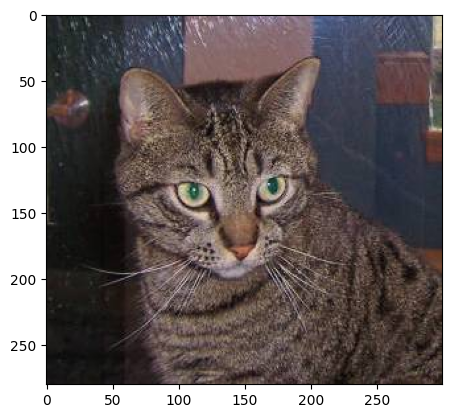

In [10]:
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[1])))
plt.show()

### LeNet5

In [11]:
lenet5 = tf.keras.models.Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(kernel_size=5, strides=1, padding='valid', filters=6, activation='tanh'),
    AveragePooling2D(pool_size=2, strides=2, padding='valid'),
    Conv2D(kernel_size=5, strides=1, padding='valid', filters=16, activation='tanh'),
    AveragePooling2D(pool_size=2, strides=2, padding='valid'),
    Conv2D(kernel_size=5, strides=1, padding='valid', filters=120, activation='tanh'),
    Flatten(),
    Dense(84, activation='tanh'),
    Dense(2, activation='softmax')
])
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 30, 30, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 13, 13, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9720)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       816,564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 867,726 (3.31 MB)

 Trainable params: 867,726 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
lenet5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['Accuracy'])
h = lenet5.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/20 ━━━━━━━━━━━━━━━━━━━━ 2:38 8s/step - Accuracy: 0.4400 - loss: 0.7312

I0000 00:00:1724752583.029235     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - Accuracy: 0.5027 - loss: 1.6858 - val_Accuracy: 0.5220 - val_loss: 0.6974
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - Accuracy: 0.5591 - loss: 0.6939 - val_Accuracy: 0.5320 - val_loss: 0.6910
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - Accuracy: 0.6348 - loss: 0.6436 - val_Accuracy: 0.5480 - val_loss: 0.6893
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - Accuracy: 0.6338 - loss: 0.6376 - val_Accuracy: 0.5680 - val_loss: 0.6955
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - Accuracy: 0.6489 - loss: 0.6214 - val_Accuracy: 0.5580 - val_loss: 0.6969
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - Accuracy: 0.6871 - loss: 0.5949 - val_Accuracy: 0.5680 - val_loss: 0.7108
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - Accuracy: 0.6846 - loss: 0.5950 - val_Accuracy: 0.5780 - val_loss: 0.7078
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - Accuracy: 0.7000 - loss: 0.5834 - val_Accuracy: 0.5940 - val

In [13]:
lenet5.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - Accuracy: 0.5523 - loss: 0.8035


[0.7990909218788147, 0.5640000104904175]

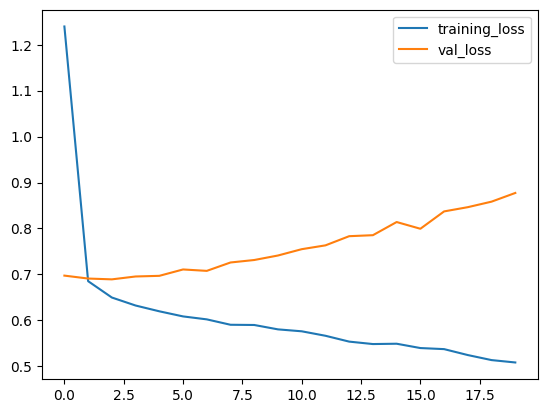

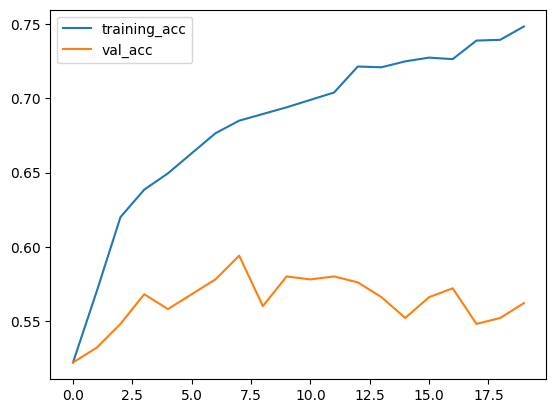

In [14]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['Accuracy'], label='training_acc')
plt.plot(h.history['val_Accuracy'], label='val_acc')
plt.legend()
plt.show()

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227, 227),
        batch_size=100,
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=100,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(227, 227),
        batch_size=100,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### AlexNet

In [19]:
alexnet = tf.keras.models.Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(kernel_size=11, strides=4, filters=96, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2, padding='valid'),
    Conv2D(kernel_size=5, strides=1, filters=256, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2, padding='valid'),
    Conv2D(kernel_size=3, strides=1, filters=384, padding='same', activation='relu'),
    Conv2D(kernel_size=3, strides=1, filters=384, padding='same', activation='relu'),
    Conv2D(kernel_size=3, strides=1, filters=256, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2, padding='valid'),
    Flatten(),
    Dense(9216, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
])
alexnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9216)           │    84,943,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,233,410 (546.39 MB)

 Trainable params: 143,233,410 (546.39 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
alexnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['Accuracy'])
h = alexnet.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20


2024-08-27 09:58:27.207543: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,96,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,96,27,27]{3,2,1,0}, f32[100,256,27,27]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-27 09:58:27.914023: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.706569387s
Trying algorithm eng0{} for conv (f32[256,96,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,96,27,27]{3,2,1,0}, f32[100,256,27,27]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-27 09:58:29.483465: E external/

 2/20 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - Accuracy: 0.5050 - loss: 3.9487 

W0000 00:00:1724752714.039046     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - Accuracy: 0.4955 - loss: 2.3932

W0000 00:00:1724752719.445122     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 330ms/step - Accuracy: 0.4950 - loss: 2.3435 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - Accuracy: 0.5202 - loss: 0.6962 - val_Accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 284ms/step - Accuracy: 0.5019 - loss: 0.6935 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - Accuracy: 0.4773 - loss: 0.6935 - val_Accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - Accuracy: 0.4970 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 292ms/step - Accuracy: 0.4818 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - Accuracy: 0.4890 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - Accuracy: 0.4818 - loss: 0.6932 - val_Accuracy: 0.5000 - val

In [21]:
alexnet.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - Accuracy: 0.4985 - loss: 0.6932


[0.693149209022522, 0.5]

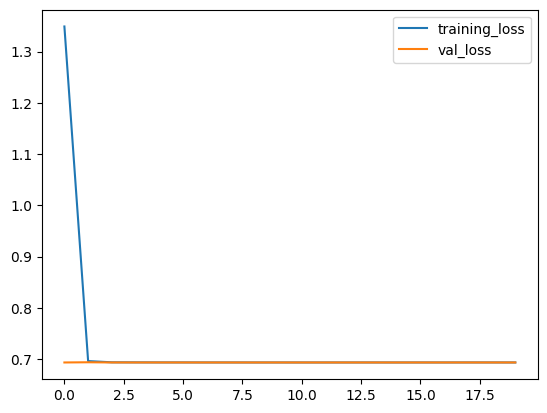

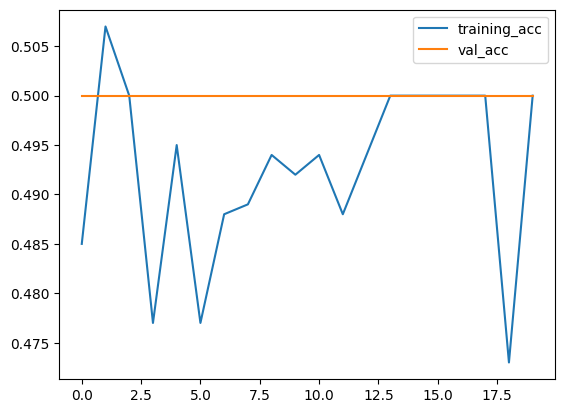

In [22]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['Accuracy'], label='training_acc')
plt.plot(h.history['val_Accuracy'], label='val_acc')
plt.legend()
plt.show()

In [23]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### VGG16

In [24]:
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)

vggmodel = Model(inputs=base_model.input, outputs=x)
vggmodel.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
vggmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
h = vggmodel.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20


2024-08-27 10:01:23.784876: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[100,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-27 10:01:24.957081: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63575, expected 3.88662
2024-08-27 10:01:24.957151: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.83747, expected 5.08834
2024-08-27 10:01:24.957161: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.21971, expected 5.47058
2024-08-27 10:01:24.957169: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137]

20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 397ms/step - acc: 0.4890 - loss: 0.7648 - val_acc: 0.7240 - val_loss: 0.5584
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - acc: 0.7919 - loss: 0.4871 - val_acc: 0.8040 - val_loss: 0.4535
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - acc: 0.8424 - loss: 0.3965 - val_acc: 0.8180 - val_loss: 0.4236
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - acc: 0.8569 - loss: 0.3456 - val_acc: 0.8420 - val_loss: 0.3822
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - acc: 0.8889 - loss: 0.3038 - val_acc: 0.8500 - val_loss: 0.3653
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 340ms/step - acc: 0.9058 - loss: 0.2823 - val_acc: 0.8520 - val_loss: 0.3531
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 329ms/step - acc: 0.9174 - loss: 0.2551 - val_acc: 0.8620 - val_loss: 0.3422
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - acc: 0.9341 - loss: 0.2311 - val_acc: 0.8660 - val_loss: 0.3325
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step - acc: 0.9287 

In [26]:
vggmodel.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - acc: 0.8752 - loss: 0.2635


[0.2649596631526947, 0.878000020980835]

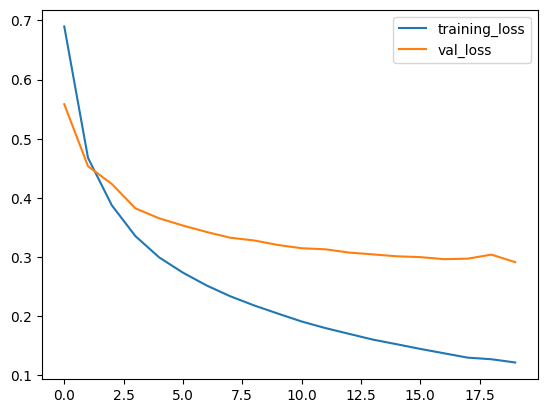

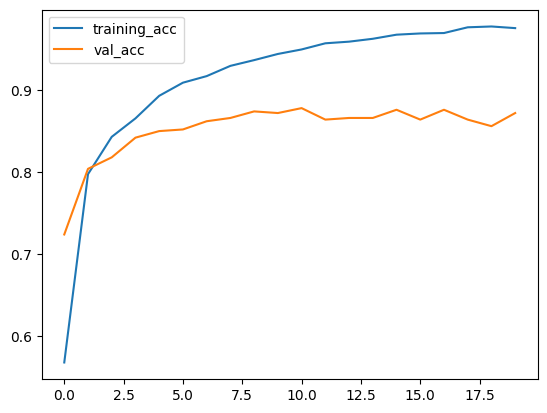

In [27]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_acc')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

### InceptionV3

In [ ]:
base_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
inceptionv3model = Model(inputs=base_model.input, outputs=x)
inceptionv3model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [29]:
inceptionv3model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['Accuracy'])
h = inceptionv3model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 603ms/step - Accuracy: 0.8917 - loss: 0.3466 - val_Accuracy: 0.9880 - val_loss: 0.1741
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - Accuracy: 0.9942 - loss: 0.0394 - val_Accuracy: 0.9840 - val_loss: 0.1693
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - Accuracy: 0.9935 - loss: 0.0619 - val_Accuracy: 0.9840 - val_loss: 0.2049
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - Accuracy: 0.9977 - loss: 0.0125 - val_Accuracy: 0.9820 - val_loss: 0.2567
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - Accuracy: 0.9980 - loss: 0.0045 - val_Accuracy: 0.9900 - val_loss: 0.2380
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step - Accuracy: 1.0000 - loss: 2.4468e-04 - val_Accuracy: 0.9900 - val_loss: 0.2117
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - Accuracy: 1.0000 - loss: 2.5509e-05 - val_Accuracy: 0.9900 - val_loss: 0.2161
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - Accuracy: 1.0000 - loss: 6.1799e-07 - va

In [30]:
inceptionv3model.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - Accuracy: 0.9749 - loss: 0.3307


[0.2338719516992569, 0.9800000190734863]

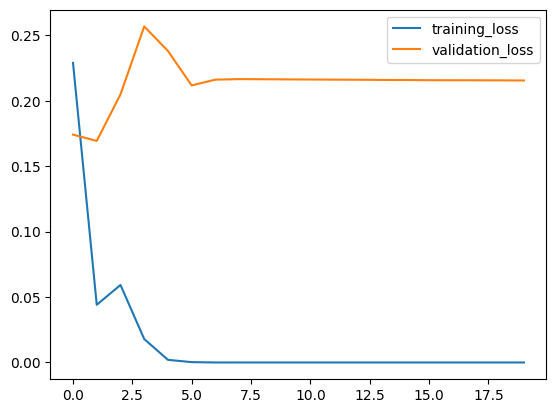

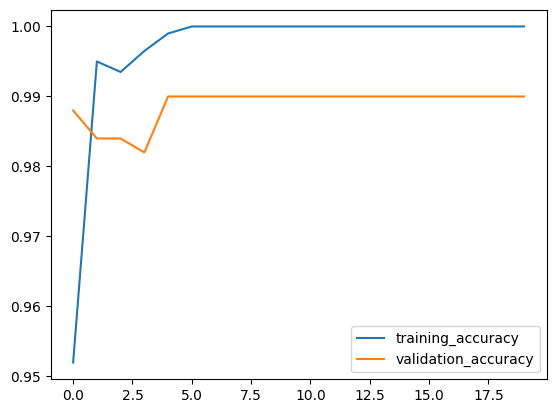

In [31]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['Accuracy'], label='training_accuracy')
plt.plot(h.history['val_Accuracy'], label='validation_accuracy')
plt.legend()
plt.show()

### ResNet50

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
resnetmodel = Model(inputs=base_model.input, outputs=x)
resnetmodel.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
resnetmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
h = resnetmodel.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 514ms/step - acc: 0.5300 - loss: 3.3088 - val_acc: 0.6300 - val_loss: 0.6945
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - acc: 0.5674 - loss: 0.9948 - val_acc: 0.5260 - val_loss: 1.3204
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - acc: 0.5523 - loss: 0.9839 - val_acc: 0.5220 - val_loss: 0.8855
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - acc: 0.6329 - loss: 0.6959 - val_acc: 0.6620 - val_loss: 0.6256
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - acc: 0.6962 - loss: 0.5547 - val_acc: 0.6860 - val_loss: 0.6084
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - acc: 0.6941 - loss: 0.5660 - val_acc: 0.6200 - val_loss: 0.6915
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - acc: 0.7006 - loss: 0.5667 - val_acc: 0.6660 - val_loss: 0.6199
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - acc: 0.7297 - loss: 0.5211 - val_acc: 0.6740 - val_loss: 0.6187
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - a

In [34]:
resnetmodel.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - acc: 0.6764 - loss: 0.6391


[0.6135059595108032, 0.6899999976158142]

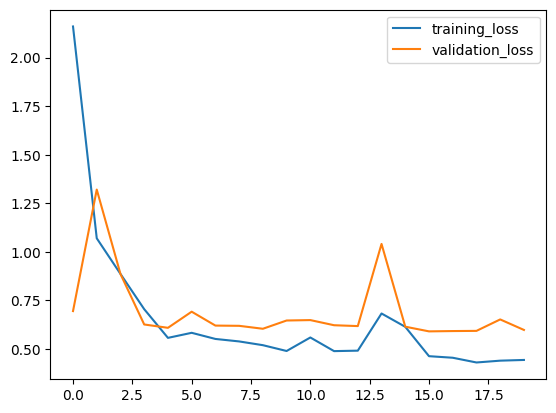

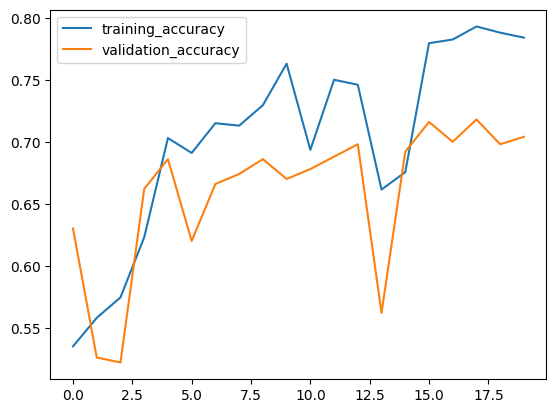

In [35]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

### EfficientnetB0

In [ ]:
base_model = EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
efficientmodel = Model(inputs=base_model.input, outputs=x)
efficientmodel.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

In [38]:
efficientmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
h = efficientmodel.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 552ms/step - acc: 0.5111 - loss: 4.9903 - val_acc: 0.5000 - val_loss: 2.5520
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - acc: 0.5007 - loss: 1.5872 - val_acc: 0.5000 - val_loss: 0.7612
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 303ms/step - acc: 0.5003 - loss: 0.7197 - val_acc: 0.5000 - val_loss: 0.6936
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - acc: 0.5154 - loss: 0.7113 - val_acc: 0.5000 - val_loss: 0.8663
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - acc: 0.4973 - loss: 0.8354 - val_acc: 0.5080 - val_loss: 0.6928
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - acc: 0.5093 - loss: 0.7489 - val_acc: 0.5000 - val_loss: 0.7440
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 292ms/step - acc: 0.5220 - loss: 0.7464 - val_acc: 0.5000 - val_loss: 0.8575
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - acc: 0.5139 - loss: 0.8017 - val_acc: 0.5000 - val_loss: 1.2461
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - 

In [39]:
efficientmodel.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - acc: 0.5001 - loss: 0.7010


[0.7011169791221619, 0.5]

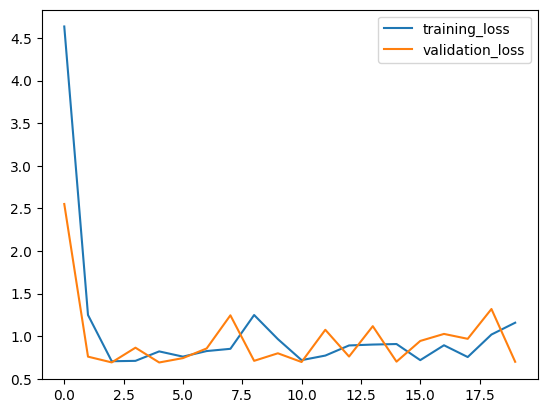

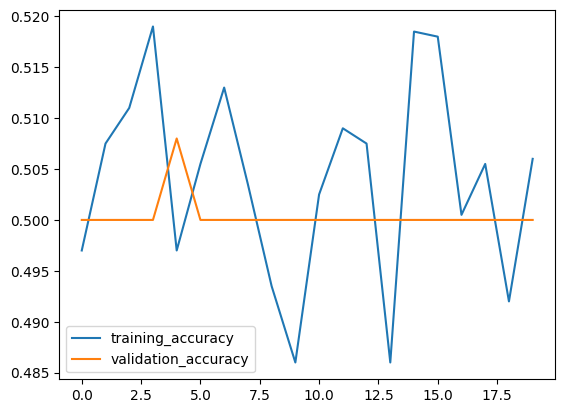

In [40]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

### MobileNetV2

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
mobilemodel = Model(inputs=base_model.input, outputs=x)
mobilemodel.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_6"

In [43]:
mobilemodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])
h = mobilemodel.fit(train_generator, validation_data=validation_generator, epochs=20)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - acc: 0.9992 - loss: 0.0057 - val_acc: 0.9780 - val_loss: 0.6754
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - acc: 0.9999 - loss: 0.0012 - val_acc: 0.9760 - val_loss: 0.6862
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - acc: 0.9978 - loss: 0.0105 - val_acc: 0.9680 - val_loss: 0.7548
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - acc: 0.9984 - loss: 0.0152 - val_acc: 0.9800 - val_loss: 0.6214
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - acc: 0.9993 - loss: 0.0041 - val_acc: 0.9820 - val_loss: 0.7037
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - acc: 0.9975 - loss: 0.0035 - val_acc: 0.9840 - val_loss: 0.6976
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - acc: 0.9981 - loss: 0.0120 - val_acc: 0.9780 - val_loss: 0.7805
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - acc: 0.9981 - loss: 0.0250 - val_acc: 0.9740 - val_loss: 0.7033
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - acc: 0.9

In [44]:
mobilemodel.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - acc: 0.9684 - loss: 1.0094


[0.8486384749412537, 0.9779999852180481]

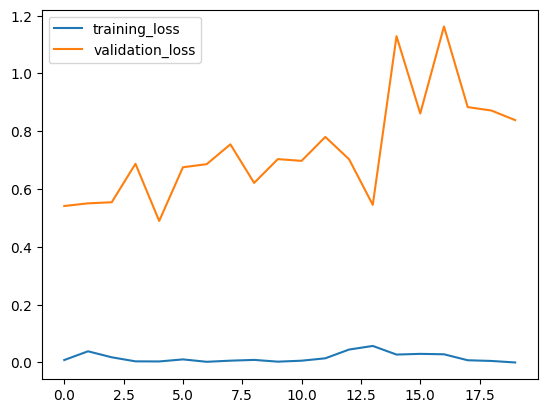

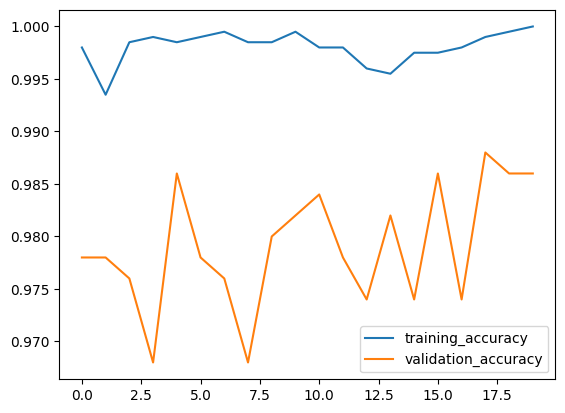

In [45]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()